In [1]:
import torch

In [2]:
from random import Random
SEED = 5

random_gen = Random(x = SEED)

In [3]:
from sklearn.datasets import make_moons
from math import floor
N = 1000
TRAIN_PERCENT = 0.8
NOISE = 0.1

x,y = make_moons(n_samples=N, shuffle=True, noise=NOISE, random_state=5)

X_train, y_train = x[:floor(TRAIN_PERCENT*N), :], y[:floor(TRAIN_PERCENT*N)]
X_valid, y_valid = x[floor(TRAIN_PERCENT*N):, :], y[floor(TRAIN_PERCENT*N):]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(800, 2) (800,)
(200, 2) (200,)


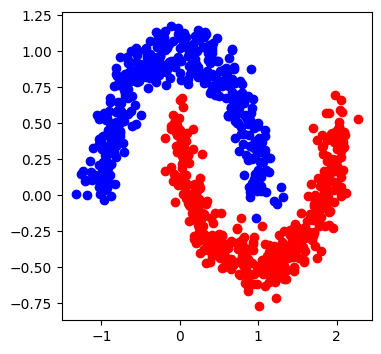

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
train_one_indices = np.argwhere(y_train == 1)
train_zero_indices = np.argwhere(y_train == 0)
ax.plot(X_train[train_one_indices,0], X_train[train_one_indices,1], 'ro')
ax.plot(X_train[train_zero_indices, 0], X_train[train_zero_indices, 1], 'bo')

In [5]:
X_train, y_train = torch.tensor(X_train), torch.tensor(y_train)
X_valid, y_valid = torch.tensor(X_valid), torch.tensor(y_valid)

y_train = torch.nn.functional.one_hot(y_train, num_classes=2)
y_valid = torch.nn.functional.one_hot(y_valid, num_classes=2)

In [6]:
torch.manual_seed(5)
w = torch.randn(size=(2,2))
w = w.to(torch.float64)
w.requires_grad = True
w.retain_grad()

b = torch.randn(size=(1,2))
b = b.to(torch.float64)
b.requires_grad = True
b.retain_grad()

In [7]:
def predict(x):
    a = x @ w.t() + b
    return torch.softmax(a,dim=1)

In [8]:
def loss_fn(x,y):
    y_hat = predict(x)
    # print(y)
    # print(y_hat)
    return torch.mean(-(y*torch.log(y_hat)).sum(dim=1))
    #return torch.sqrt((((y - y_hat)**2).sum(dim=1))).sum(dim=0) / y.shape[0]

In [9]:
#SGD
from math import ceil

sampler = Random(x = SEED)
EPOCHS = 1000

indices_train = [i for i in range(len(X_train))]
indices_valid = [i for i in range(len(X_valid))]
N = len(X_train)
BATCH_SZ = 64
NUM_BATCHES = ceil(N / BATCH_SZ)
DELTA = 1e-2
losses_sgd_train, losses_sgd_valid = [],[]
batch_x, batch_y = np.zeros(shape=(BATCH_SZ,2)), np.zeros(shape=(BATCH_SZ,2))

for _ in range(EPOCHS):
    sampler.shuffle(indices_train)
    for batch_ind in range(NUM_BATCHES):
        batch_indices = indices_train[batch_ind * BATCH_SZ : (batch_ind + 1) * BATCH_SZ]
        # batch_x = [X_train[i,:] for i in batch_indices]
        # batch_y = [y_train[i] for i in batch_indices]
        for i,index in enumerate(batch_indices):
            batch_x[i] = X_train[index,:]
            batch_y[i] = y_train[index,:]
        batch_x = torch.tensor(batch_x)
        batch_y = torch.tensor(batch_y)
        sgd_train_loss = loss_fn(batch_x, batch_y)
        sgd_train_loss.backward()
        
        with torch.no_grad():
            w -= DELTA * w.grad.data
            b -= DELTA * b.grad.data
            w.grad.zero_()
            b.grad.zero_()

    with torch.no_grad():
        losses_sgd_train.append(loss_fn(X_train,y_train).data)
        losses_sgd_valid.append(loss_fn(X_valid, y_valid).data)

        #     batch_indices = indices_valid[batch_ind * BATCH_SZ : (batch_ind + 1) * BATCH_SZ]
        #     batch_x_valid = [X_valid[i] for i in batch_indices]
        #     batch_y_valid = [y_valid[i] for i in batch_indices]
        #     sgd_valid_loss = loss_fn(batch_x_valid, batch_y_valid)
        #     losses_sgd_valid.append(sgd_valid_loss)

C:\Users\Youssef Shawki\AppData\Local\Temp\ipykernel_5216\1199915728.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_x = torch.tensor(batch_x)
C:\Users\Youssef Shawki\AppData\Local\Temp\ipykernel_5216\1199915728.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_y = torch.tensor(batch_y)


In [10]:
# for SGD
epochs = 1000
delta = 0.1
sampler = Random(5)
Batch_size = 64
num_batches = int(np.ceil(len(X_train) / Batch_size))
indices = np.linspace(0,799,800, dtype=int)
sgd_train_loss, sgd_valid_loss = [], []
x_batch = np.zeros((Batch_size, 2))
y_batch = np.zeros((Batch_size, 2))


for _ in range(epochs):
    
    sampler.shuffle(indices)
    for batch_idx in range(num_batches):
        batch_indices = indices[batch_idx * Batch_size : (batch_idx + 1) * Batch_size]
#         print(len(batch_indices))
        for i,idx in enumerate(batch_indices):
            x_batch[i] = X_train[idx,:]
            y_batch[i] = y_train[idx,:]
#             print(y_train[idx,:], " ", y_batch[i])
            
        x_batch = torch.tensor(x_batch)
        y_batch = torch.tensor(y_batch)
        
        current_train_loss = loss_fn(x_batch,y_batch)
        current_train_loss.backward()
#         sgd_train_loss.append(current_train_loss.data)
        with torch.no_grad():
#             current_valid_loss=loss_fun(x_valid,y_valid)
#             sgd_valid_loss.append(current_valid_loss.data)
            w -= delta * w.grad.data
            b -= delta * b.grad.data
            w.grad.zero_() #underscore means inplace
            b.grad.zero_()
            
    with torch.no_grad():
            current_train_loss = loss_fn(X_train, y_train)
            sgd_train_loss.append(current_train_loss.data)
            
            current_valid_loss = loss_fn(X_valid, y_valid)
            sgd_valid_loss.append(current_valid_loss.data)

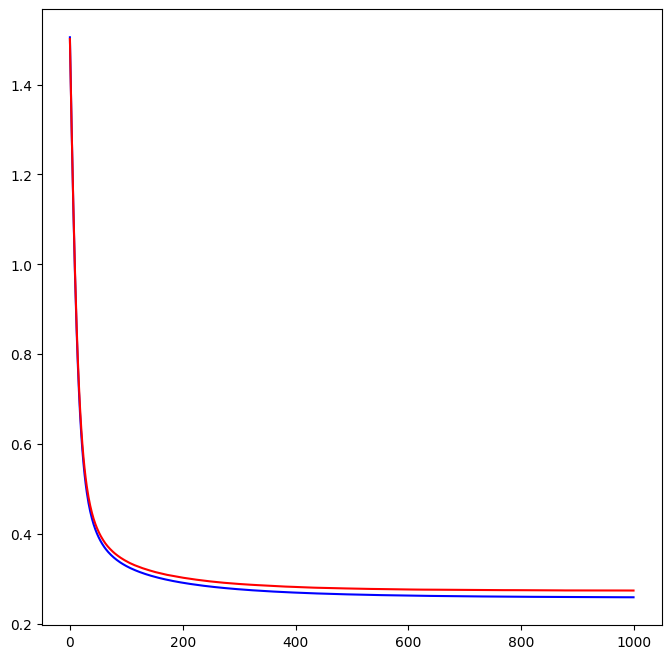

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.plot(losses_sgd_train, 'b')
ax.plot(losses_sgd_valid,'r')


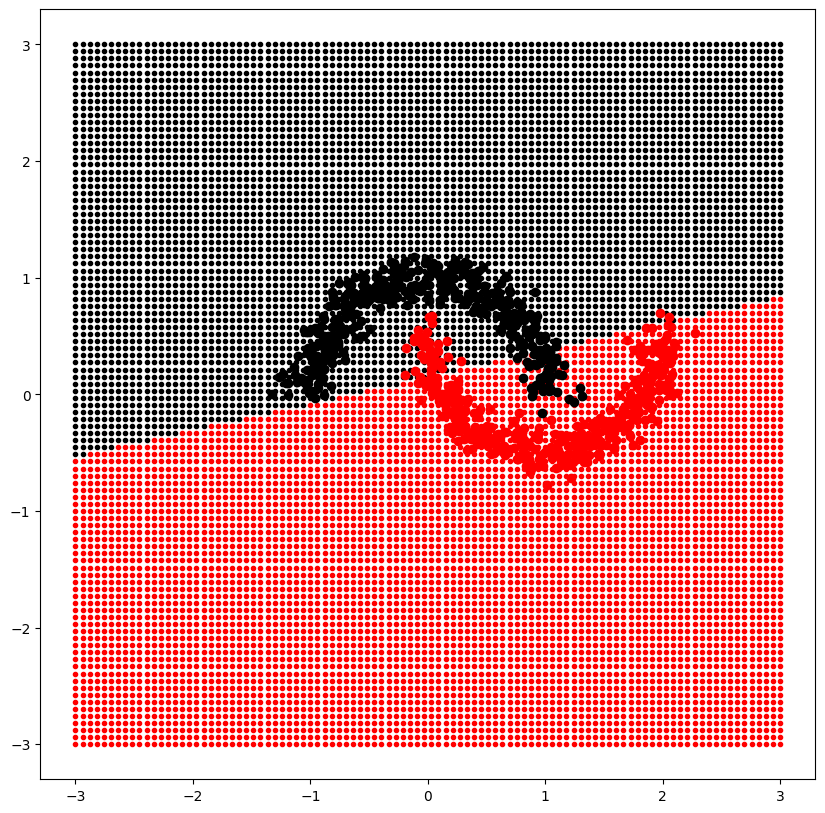

In [12]:
with torch.no_grad():
    x_0 = torch.linspace(-3, 3, 100).repeat(1,100).t()
    x_1 = torch.linspace(-3, 3, 100).repeat(100,1).t().reshape(-1,1)
    x = torch.hstack((x_0, x_1)).to(torch.double)
    x_plt = x.numpy()
    y_hat = predict(x)
    c_hat = torch.argmax(y_hat, dim=1)
    c_hat_plt = c_hat.numpy()
    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(x_plt[np.argwhere(c_hat_plt==1),0], x_plt[np.argwhere(c_hat_plt==1),1], 'r.')
ax.plot(x_plt[np.argwhere(c_hat_plt==0),0], x_plt[np.argwhere(c_hat_plt==0),1], 'k.')
ax.plot(X_train[train_one_indices,0], X_train[train_one_indices,1], 'ro')
ax.plot(X_train[train_zero_indices,0], X_train[train_zero_indices,1],'ko')